In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [157]:
def read_data(file):
    print(file)
    df = pd.read_csv(file).rename(columns=lambda x: x.strip())
    results = df.groupby(['iters', 'train_size', 'test_size'], as_index=False).agg({'pval':['mean','std'], 'time':['mean', 'std']})
    results.columns = ['iters', 'train_size', 'test_size',
                       'pval_mean', 'pval_std', 'time_mean', 'time_std']
    return results

In [166]:
files = [
('a129', '27-07-2023_11:36:31'),
('a211', '28-07-2023_16:36:57'),
('a214', '02-08-2023_01:46:14'),
('a220', '29-07-2023_09:27:19'),
('a234', '02-08-2023_06:23:18'),
('a284', '30-07-2023_12:39:59'),
('a299', '02-08-2023_12:05:11'),
('a306', '31-07-2023_20:37:35'),
('a359', '02-08-2023_16:26:54'),
('a36', '02-08-2023_21:00:20'),
('a364', '01-08-2023_01:16:24'),
('a399', '01-08-2023_05:41:25'),
('a454', '03-08-2023_02:11:00'),
('a466', '01-08-2023_10:25:44'),
('a488', '03-08-2023_07:01:37'),
('a504', '01-08-2023_15:43:05'),
('a512', '03-08-2023_11:43:20'),
('a562', '01-08-2023_20:39:23'),
('a94', '03-08-2023_16:44:27')]

dfs = []
for f, s in files:
    fname = f'../results/cliff_results_{f}_{s}.csv'
    df = read_data(fname)
    df['name'] = f
    dfs.append(df)

../results/cliff_results_a129_27-07-2023_11:36:31.csv
../results/cliff_results_a211_28-07-2023_16:36:57.csv
../results/cliff_results_a214_02-08-2023_01:46:14.csv
../results/cliff_results_a220_29-07-2023_09:27:19.csv
../results/cliff_results_a234_02-08-2023_06:23:18.csv
../results/cliff_results_a284_30-07-2023_12:39:59.csv
../results/cliff_results_a299_02-08-2023_12:05:11.csv
../results/cliff_results_a306_31-07-2023_20:37:35.csv
../results/cliff_results_a359_02-08-2023_16:26:54.csv
../results/cliff_results_a36_02-08-2023_21:00:20.csv
../results/cliff_results_a364_01-08-2023_01:16:24.csv
../results/cliff_results_a399_01-08-2023_05:41:25.csv
../results/cliff_results_a454_03-08-2023_02:11:00.csv
../results/cliff_results_a466_01-08-2023_10:25:44.csv
../results/cliff_results_a488_03-08-2023_07:01:37.csv
../results/cliff_results_a504_01-08-2023_15:43:05.csv
../results/cliff_results_a512_03-08-2023_11:43:20.csv
../results/cliff_results_a562_01-08-2023_20:39:23.csv
../results/cliff_results_a94_

In [168]:
results = pd.concat(dfs)

In [197]:
not_secure_s = results.groupby('name')['pval_mean'].min() < 1e-5
not_secure = list(not_secure_s[not_secure_s].index.values)
secure = list(not_secure_s[~not_secure_s].index.values)
secure, not_secure

(['a234', 'a284', 'a306', 'a399', 'a466', 'a512', 'a94'],
 ['a129',
  'a211',
  'a214',
  'a220',
  'a299',
  'a359',
  'a36',
  'a364',
  'a454',
  'a488',
  'a504',
  'a562'])

# Varying Iterations

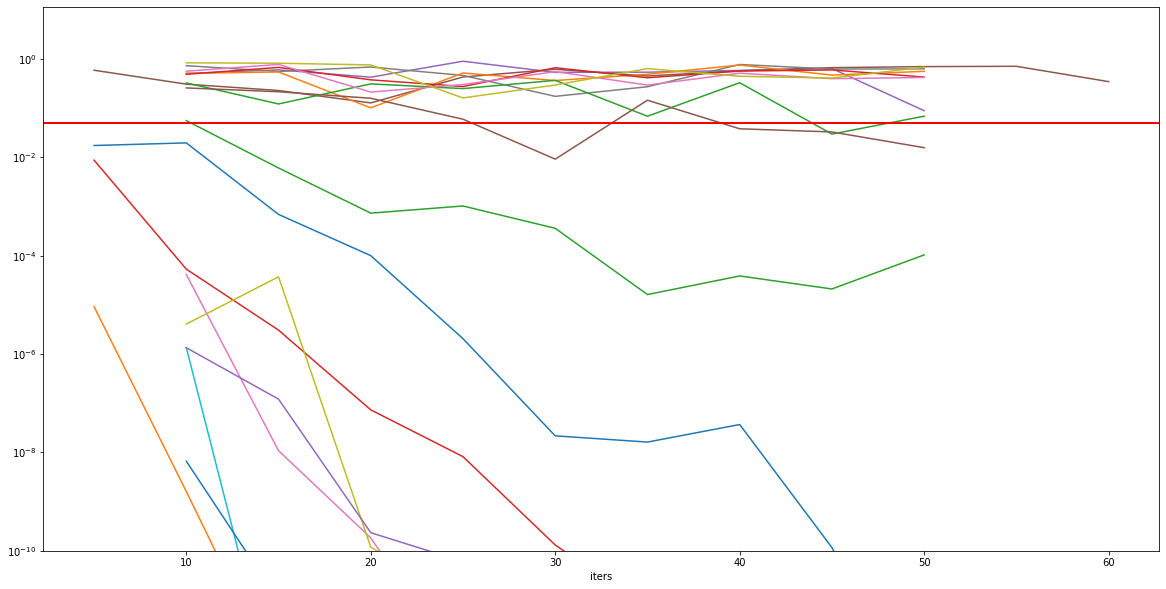

In [217]:
def plot_iters(results, ax):
    iters_df = results[(results['train_size'] == 1024) & (results['test_size'] == 512)]
    plt.yscale('log')
    plt.ylim((1e-10, None))
    iters_df.plot(ax=ax, x='iters', y='pval_mean', legend=None)#yerr='pval_std', legend=None)
    plt.axhline(y = 0.05, color = 'r', linestyle = '-')
    #iters_df.plot(ax=ax, x='iters', y='time_mean', secondary_y=True, legend=None)#, yerr='time_std');

fig, ax = plt.subplots()
[plot_iters(df, ax) for df in dfs];

# Varying Train Data

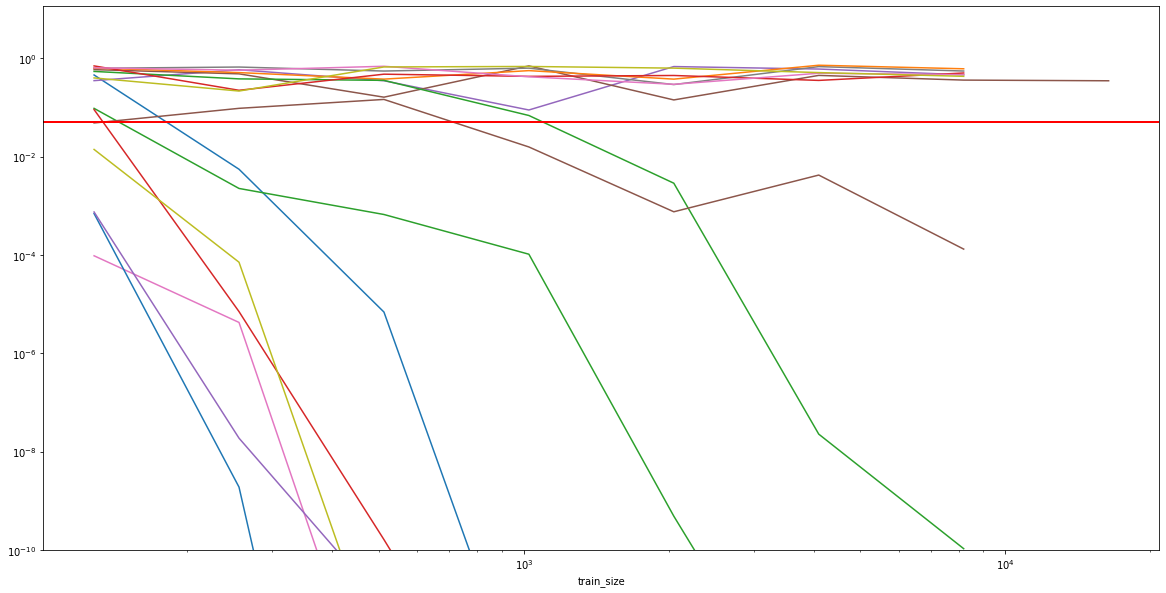

In [218]:
def plot_train(results, ax):
    iters_df = results[(results['iters'] == 50) & (results['test_size'] == 512)]
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim((1e-10, None))
    plt.axhline(y = 0.05, color = 'r', linestyle = '-')

    iters_df.plot(ax=ax, x='train_size', y='pval_mean', legend=None)
    #iters_df.plot(ax=ax, x='train_size', y='time_mean', yerr='time_std', secondary_y=True, legend=None);

fig, ax = plt.subplots()
[plot_train(df, ax) for df in dfs];

# Varying Test Data

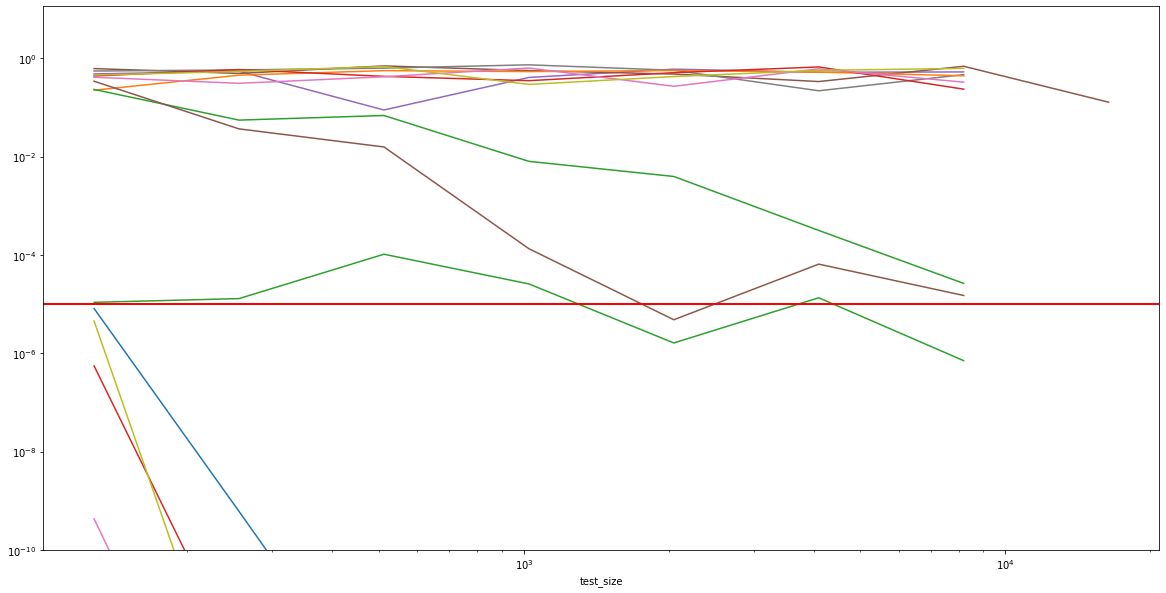

In [220]:
def plot_test(results, ax):
    iters_df = results[(results['iters'] == 50) & (results['train_size'] == 1024)]
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim((1e-10, None))
    plt.axhline(y = 1e-5, color = 'r', linestyle = '-')

    iters_df.plot(ax=ax, x='test_size', y='pval_mean', legend=None)
    #iters_df.plot(ax=ax, x='test_size', y='time_mean', yerr='time_std', secondary_y=True, legend=None);

fig, ax = plt.subplots()
[plot_test(df, ax) for df in dfs];

# Sorting by Pval and Time

In [182]:
# Top-20 p-values
results.sort_values('pval_mean').head(20)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std,name
767,60,16384,16384,1.879709e-194,0.000000e+00,139.735581,0.577029,a129
766,60,16384,8192,5.959023e-186,0.000000e+00,105.695233,0.562816,a129
765,60,16384,4096,1.563855e-176,0.000000e+00,88.640815,0.424273,a129
703,55,16384,16384,1.276047e-173,0.000000e+00,128.490270,0.899301,a129
702,55,16384,8192,2.020935e-160,3.500404e-160,96.790959,0.361931,a129
701,55,16384,4096,1.348027e-159,1.121249e-159,80.893498,0.266822,a129
638,50,16384,8192,2.489046e-156,4.309349e-156,88.220903,0.573968,a129
639,50,16384,16384,1.104415e-155,1.912878e-155,116.913507,0.083470,a129
764,60,16384,2048,1.605936e-154,2.781563e-154,79.871151,0.285364,a129
767,60,16384,16384,2.253979e-149,3.903403e-149,139.570037,0.506878,a211


In [183]:
# Top-100 p-values, sorted by running time
results.sort_values('pval_mean').head(100).sort_values('time_mean').head(10)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std,name
740,60,2048,2048,9.077464e-96,1.572006e-95,18.311163,0.088501,a211
733,60,1024,4096,3.126086e-99,4.767217e-99,22.184943,0.200941,a211
677,55,2048,4096,7.057669e-97,1.222384e-96,24.322785,0.160105,a211
741,60,2048,4096,2.521005e-106,4.358011e-106,26.499058,0.044757,a211
748,60,4096,2048,1.108508e-99,1.616678e-99,27.182851,0.456970,a211
685,55,4096,4096,1.238173e-105,1.266666e-105,32.309672,0.095621,a211
606,50,1024,8192,4.777247e-98,8.213132e-98,32.445697,0.164053,a211
749,60,4096,4096,1.638027e-106,2.837146e-106,35.248132,0.149458,a211
670,55,1024,8192,2.706008e-104,4.686942e-104,35.355623,0.095890,a211
614,50,2048,8192,6.438812e-102,1.115235e-101,35.971985,0.164022,a211


In [184]:
# Fastest 10 results that achieve p < 10^-5
results[results['pval_mean'] < 1e-5].sort_values('time_mean').head(10)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std,name
73,10,256,256,2.724649e-06,2.953428e-06,1.899983,0.007884,a211
136,15,256,128,5.127231e-06,5.302727e-06,1.935312,0.019777,a211
256,25,128,128,1.580013e-06,2.689633e-06,2.013712,0.023596,a211
56,15,256,128,2.085853e-09,9.116768e-10,2.033858,0.006499,a562
74,10,256,512,1.371615e-06,1.259899e-06,2.062314,0.004806,a211
137,15,256,256,9.291319e-09,8.371791e-09,2.070885,0.016630,a211
81,10,512,256,5.235746e-06,7.978700e-06,2.083084,0.016106,a211
26,5,1024,512,9.173423e-06,4.631935e-06,2.095363,0.014767,a211
200,20,256,128,2.220781e-07,3.828068e-07,2.095537,0.007652,a211
193,20,128,256,1.387319e-06,2.078784e-06,2.102231,0.008122,a211


# What settings produce p < 1e-5 for all insecure programs?

- Small test sizes seem to be sufficient in most cases
- Large iters seems to work better (smaller std even when pvals are close)
- Maybe we should consider even larger values for iters?
- Setting iters=60, train_size=1024, test_size=256 seems reasonable, at least for these programs

In [207]:
grouped = results[results['name'].isin(not_secure)].groupby(['iters', 'train_size', 'test_size'])
stats = grouped.agg({'pval_mean': 'max', 'pval_std': 'max', 'time_mean': 'sum'})
stats[stats['pval_mean'] < 1e-5].sort_values('time_mean').head(20)

,,,pval_mean,pval_std,time_mean
iters,train_size,test_size,,,
55,512,512,4.273942e-09,4.180594e-09,16.859012
5,8192,2048,9.353751e-06,1.514783e-05,16.938681
60,512,512,3.548012e-08,6.844956e-09,17.908932
55,1024,128,1.243632e-08,1.361060e-08,18.693281
60,1024,128,3.163863e-06,5.326581e-06,19.848770
55,1024,256,1.216296e-09,1.847020e-09,19.990147
5,8192,4096,4.560238e-07,7.116695e-07,20.126163
60,1024,256,1.177453e-10,1.418483e-10,21.433553
55,512,1024,3.838283e-07,6.106585e-07,22.591315


# Scatter Plot of P-value vs Running Time

In [185]:
def scatterplot(c_col, xlim=None, ylim=None, log_scale=True):
    results.plot.scatter(x='pval_mean', y='time_mean', c=c_col, s=1, sharex=False)
    if log_scale:
        plt.xscale('log')
        #plt.yscale('log')
    plt.xlim((xlim, 1))
    plt.ylim((None, ylim))
    plt.xlabel('p-value')
    plt.ylabel('running time (s)')
    plt.show()

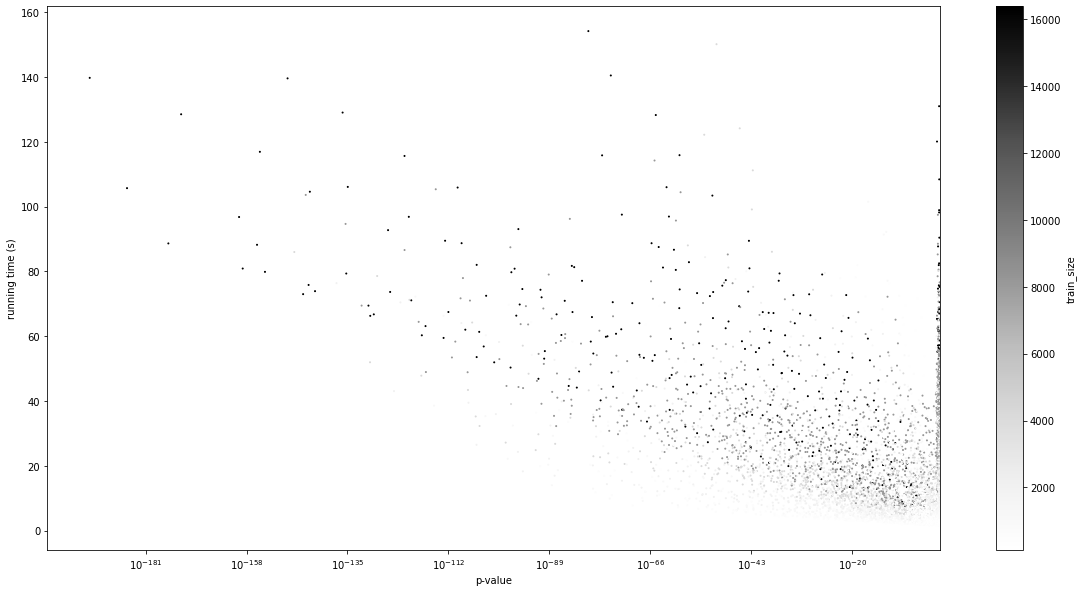

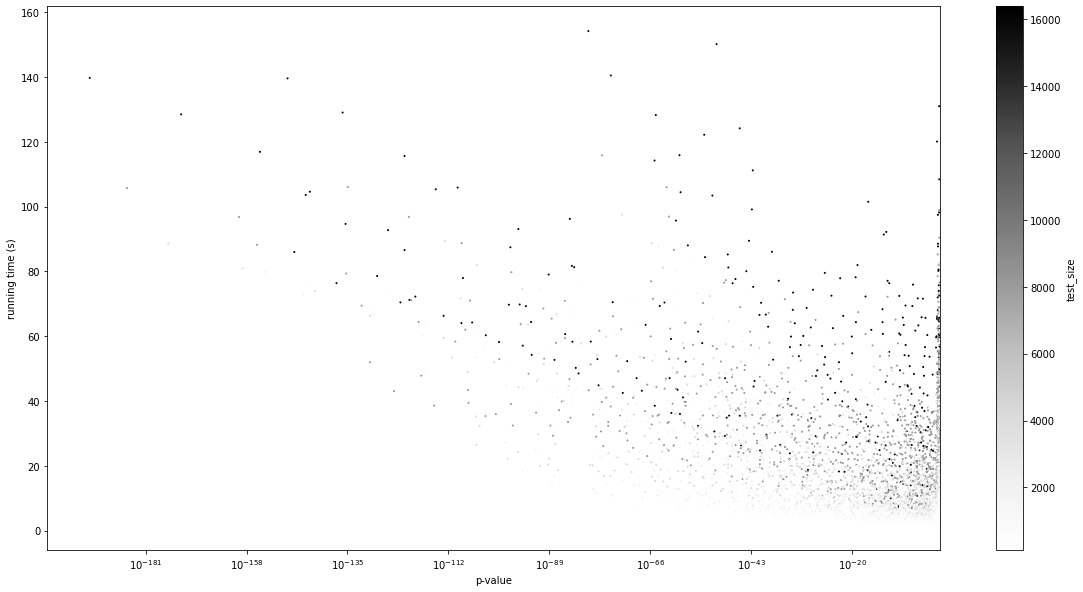

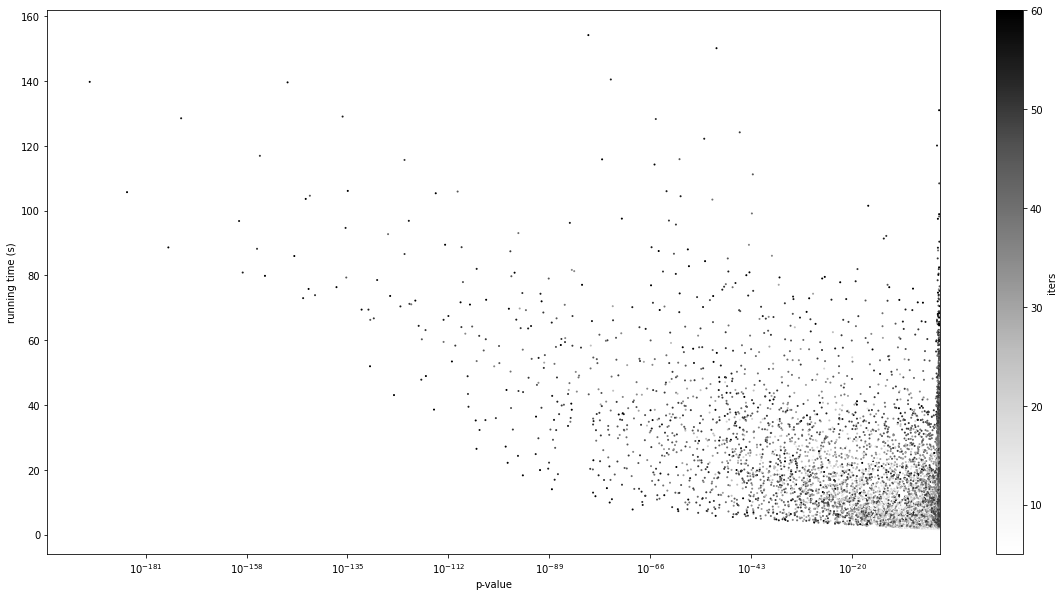

In [186]:
for c_col in ['train_size', 'test_size', 'iters']:
    scatterplot(c_col)

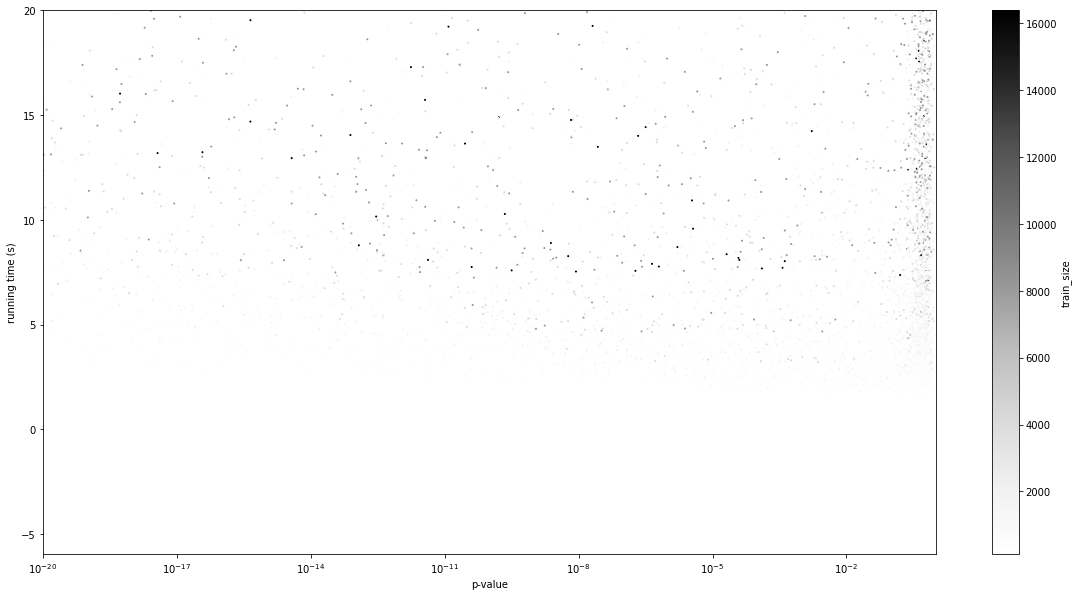

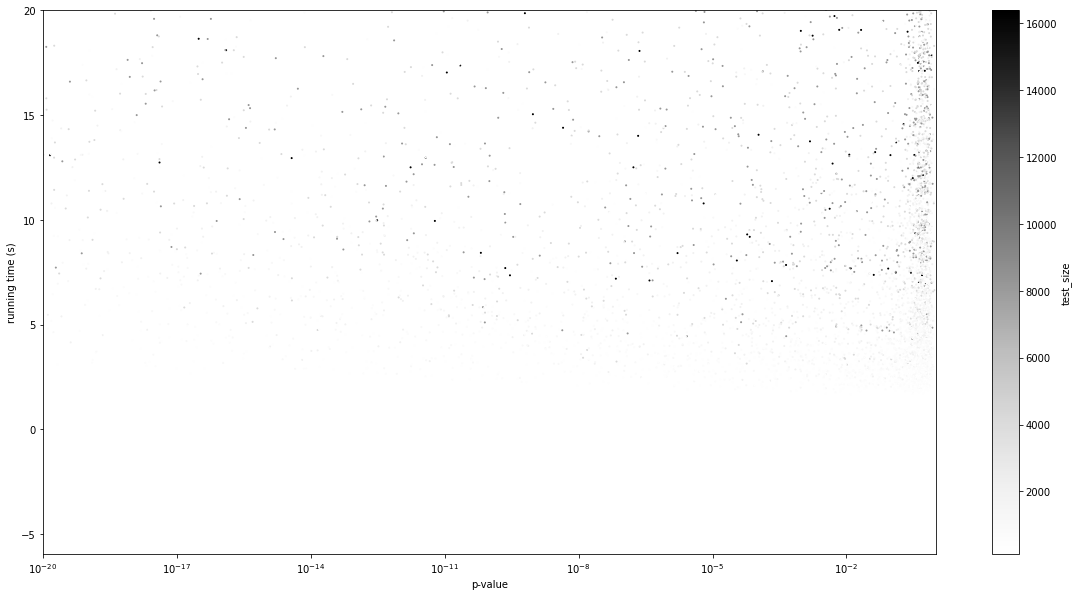

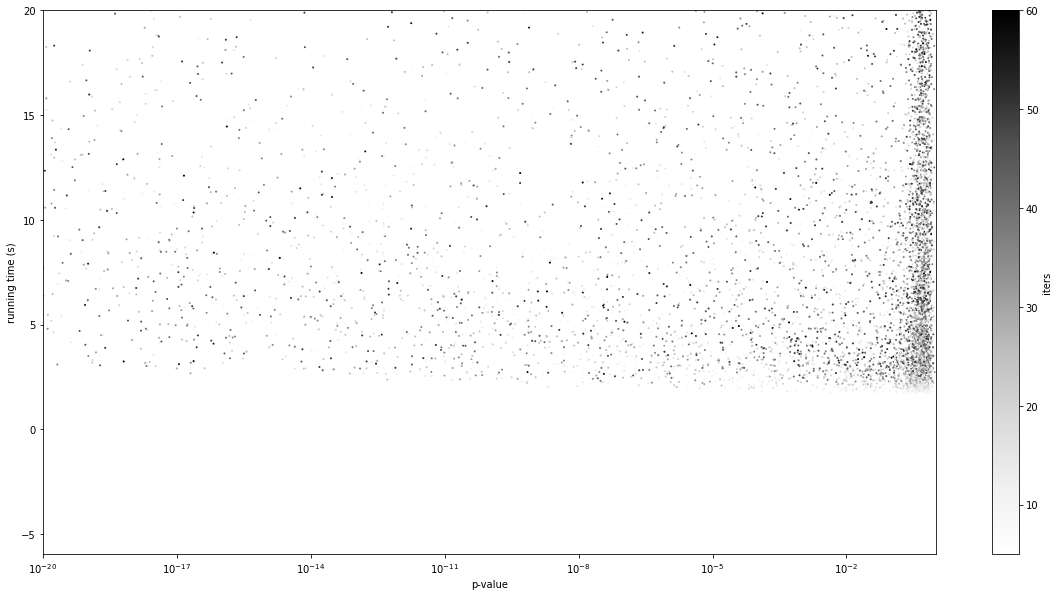

In [190]:
for c_col in ['train_size', 'test_size', 'iters']:
    scatterplot(c_col, 1e-20, 20, log_scale=True)